# Exploring Dandiset 001174: Calcium Imaging in Macaque Motor Cortices

**Disclaimer:** This notebook was AI-generated using `dandi-notebook-gen` and has not been fully verified. Please be cautious when interpreting the code or results.

## Overview of the Dandiset

Dandiset 001174 contains calcium imaging data from the supplementary motor (SMA) and primary motor areas (M1) of macaque monkeys. The data were acquired using one-photon calcium imaging with implanted gradient index lenses and GCaMP6f. The experiments examined activity patterns of projection neurons in deep layers of SMA and M1 during rest and an arm reaching task.

## What this notebook will cover

This notebook will demonstrate how to:

1.  Connect to the DANDI archive and access the Dandiset metadata.
2.  Load an NWB file from the Dandiset.
3.  Visualize the raw fluorescence data for a few regions of interest (ROIs).
4.  Visualize the spatial distribution of the ROIs using the image masks.

## Required Packages

The following packages are required to run this notebook. Please ensure that they are installed in your environment.

*   `pynwb`
*   `h5py`
*   `remfile`
*   `matplotlib`
*   `numpy`
*   `seaborn`

In [1]:
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

## Load the Dandiset using the DANDI API

This section demonstrates how to connect to the DANDI archive and access the Dandiset metadata and assets.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 45 assets in the dataset

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb
- sub-Q/sub-Q_ophys.nwb
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb


## Load metadata and data from an NWB file

This section demonstrates how to load data from an NWB file in the Dandiset. We will use the first NWB file in the list of assets, which is:

`sub-F/sub-F_ses-20240213T110430_ophys.nwb`

We will load the NWB file using `pynwb` and `remfile`.

In [3]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/193fee16-550e-4a8f-aab8-2383f6d57a03/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

nwb

root pynwb.file.NWBFile at 0x140188636776400
Fields:
  acquisition: {
    OnePhotonSeries <class 'pynwb.ophys.OnePhotonSeries'>
  }
  devices: {
    Miniscope <class 'pynwb.device.Device'>
  }
  file_create_date: [datetime.datetime(2025, 2, 3, 13, 54, 29, 336778, tzinfo=tzlocal())]
  identifier: cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
  imaging_planes: {
    ImagingPlane <class 'pynwb.ophys.ImagingPlane'>
  }
  processing: {
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Calcium imaging in SMA during the spontaneous condition
  session_start_time: 2024-02-13 11:04:30.267000+00:00
  subject: subject pynwb.file.Subject at 0x140181775700048
Fields:
  age: P5Y
  age__reference: birth
  sex: F
  species: Macaca mulatta
  subject_id: F

  timestamps_reference_time: 2024-02-13 11:04:30.267000+00:00

We can access the session description, identifier, and session start time from the NWB file.

In [4]:
nwb.session_description # (str) Calcium imaging in SMA during the spontaneous condition
nwb.identifier # (str) cfb46dc9-b1e4-4fa9-bbf7-f3314fd5c5b3
nwb.session_start_time # (datetime) 2024-02-13T11:04:30.267000+00:00

datetime.datetime(2024, 2, 13, 11, 4, 30, 267000, tzinfo=tzlocal())

## Visualize raw fluorescence data

This section demonstrates how to load and visualize the raw fluorescence data for a few ROIs.

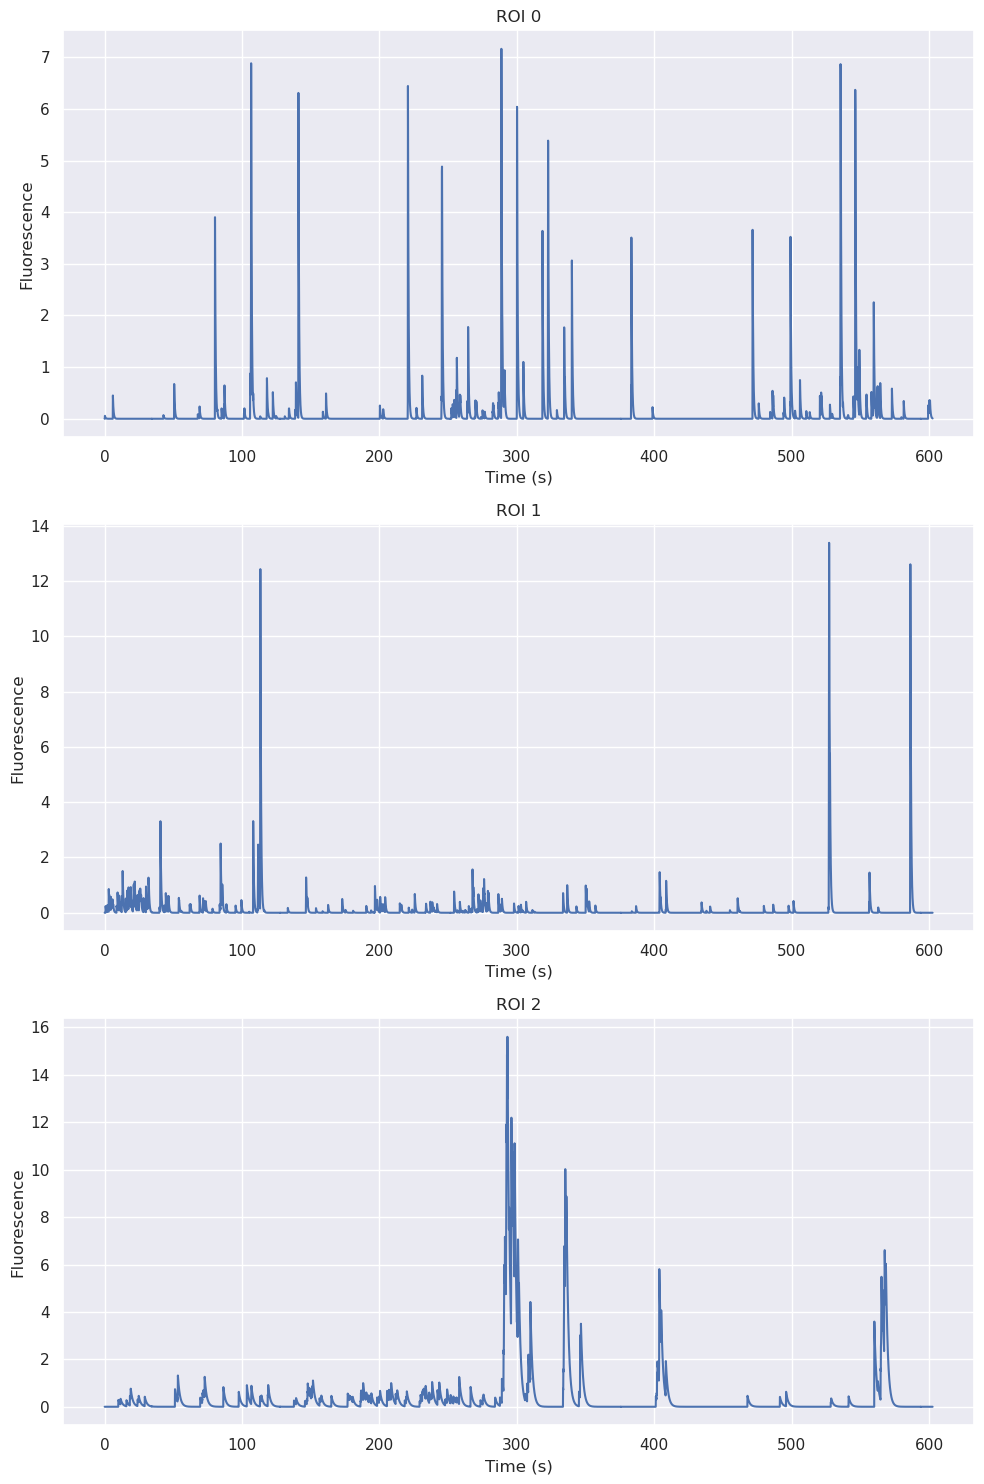

In [5]:
# Get the fluorescence data
roi_response_series = nwb.processing["ophys"].data_interfaces["Fluorescence"].roi_response_series["RoiResponseSeries"]
fluorescence_data = roi_response_series.data
num_rois = fluorescence_data.shape[1]
#timestamps = roi_response_series.timestamps[:] # Timestamps are not available

# Generate timestamps since they are not explicitly available
starting_time = nwb.acquisition["OnePhotonSeries"].starting_time
rate = nwb.acquisition["OnePhotonSeries"].rate
num_frames = fluorescence_data.shape[0]
timestamps = np.arange(num_frames) / rate + starting_time

# Plot the fluorescence data for the first 3 ROIs
num_plots = min(3, num_rois)  # Plot a maximum of 3 ROIs
plt.figure(figsize=(10, 5 * num_plots))  # Adjust figure height dynamically

for i in range(num_plots):
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(timestamps, fluorescence_data[:, i])
    plt.xlabel("Time (s)")
    plt.ylabel("Fluorescence")
    plt.title(f"ROI {i}")

plt.tight_layout()
plt.show()

The above plot shows the raw fluorescence data for the first 3 ROIs. The x-axis is time in seconds, and the y-axis is fluorescence.
The fluorescence signals show good amplitude and the noise level is low.

## Visualize image masks

This section demonstrates how to visualize the spatial distribution of the ROIs using the image masks.

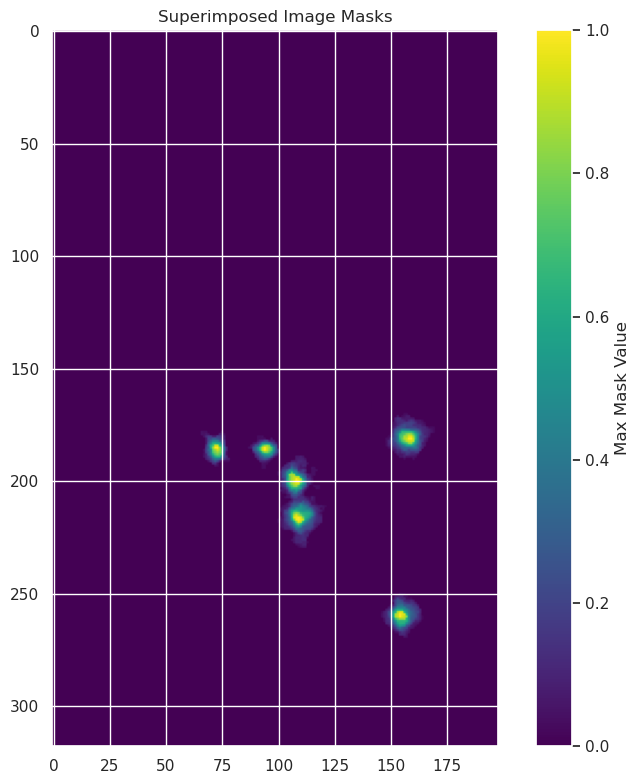

In [6]:
# Get the image masks
plane_segmentation = nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]
image_masks = plane_segmentation['image_mask']
num_rois = len(image_masks)

# Plot the image masks superimposed
plt.figure(figsize=(8, 8))
all_masks = np.zeros(image_masks[0].shape, dtype=np.float32) # use float32

for i in range(num_rois):
    all_masks = np.maximum(all_masks, image_masks[i])

plt.imshow(all_masks, cmap='viridis')
plt.colorbar(label="Max Mask Value")
plt.title("Superimposed Image Masks")
plt.tight_layout()
plt.show()

The above plot shows the superimposed image masks, offering a spatial distribution of ROIs. The masks are concentrated in a few distinct regions. The 'Max Mask Value' ranges from 0 to 1, with the concentrated ROIs showing higher mask values.

## Summary

This notebook demonstrated how to load and visualize data from Dandiset 001174, which contains calcium imaging data from macaque motor cortices. We showed how to connect to the DANDI archive, load an NWB file, visualize raw fluorescence data, and visualize image masks.

This notebook provides a starting point for exploring this Dandiset. By loading and visualizing different types of data, researchers can gain insights into the activity patterns of neurons in macaque motor cortices during rest and movement.

## Possible future directions for analysis

Here are some possible future directions for analysis:

*   Examine the relationship between neuronal activity and behavior during the reaching task.
*   Investigate the synchronous activity of cell pairs in SMA and M1.
*   Assess whether SMA and M1 neuronal activation follows specific sequential activation patterns.
*   Compare neuronal activity patterns across different conditions (rest vs. reaching task).